In [155]:
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import random
from scipy.signal import find_peaks
import random
import elm

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np


In [171]:
X = np.genfromtxt('C:/Users/alamg/Documents/MATLAB/Thesis/X_v3.csv', delimiter=',')
Y = np.genfromtxt('C:/Users/alamg/Documents/MATLAB/Thesis/Targets_v3.csv', delimiter=',')
w1= np.arange(0,3848,1)
w2=np.arange(0,101,1)
w3=np.linspace(400,700,101)
y= Y[:,0]
dP1 = []
dP2 = []
dP3 = []
dA1 = []
dA2 = []
dA3 = []
pos1 = []
pos2 = []
pos3 = []
x_2p_data= pd.DataFrame()


In [172]:
stdsc = StandardScaler()

In [173]:
for i in w1:
    peaks, _ = find_peaks(Y[i,:],height=0.4)
    if len(peaks)==1:
      dP1.append(peaks)
      dA1.append(Y[i,(peaks[0])])
      pos1.append(i)  
    if len(peaks)==2:
        dP2.append(peaks)
        dA2.append(Y[i,(peaks[0],peaks[1])])
        pos2.append(i) 
    if len(peaks)==3:
        dP3.append(peaks)
        dA3.append(Y[i,(peaks[0],peaks[1],peaks[2])])
        pos3.append(i)

In [174]:
#getting full waveform for 2 peaks responses
y_2p_wav = []
for i in range(0,len(pos2)):
    j = pos2[i]
    y_2p_wav.append(Y[j,:])

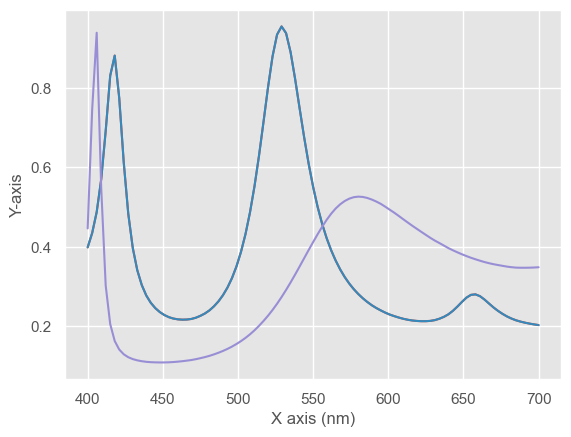

In [210]:
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w3,Y[1,:])
    plt.plot(w3,y_2p_wav[0])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()

In [187]:
x_2p_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(pos2)):
    j = pos2[i]
    k = pd.DataFrame({"P1":X[j,0],"H1":X[j,1],"H2":X[j,2],"H3":X[j,3],"W1":X[j,4]},index=[i])
    x_2p_data = pd.concat([x_2p_data, pd.DataFrame(k)], ignore_index=True)


In [211]:
y_2p_data = pd.DataFrame()
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos2)):
    m = pd.DataFrame({"Peak 1":dP2[i][0],"Peak 2":dP2[i][1],"Amp P1":dA2[i][0],"Amp P2":dA2[i][1]},index=[i])
    y_2p_data = pd.concat([y_2p_data, pd.DataFrame(m)], ignore_index=True)

2

In [212]:
# Network Settings
num_classes = 10
num_hidden_layers = 512
input_length = 2087*5

In [213]:
irx, iry = stdsc.fit_transform(x_2p_data), y_2p_data
print("x shape:", irx.shape)
print("y shape:", iry.shape)



x shape: (2087, 5)
y shape: (2087, 4)


In [214]:
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)

In [215]:
model = elm.elm(hidden_units=32, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)

# test
prediction = model.predict(x_test)
print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

KeyError: 0